In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target

irisDF

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


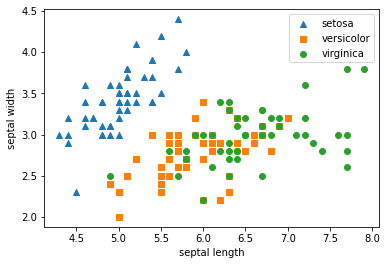

In [2]:
# 각 품종에 따라 원본 붓꽃 데이터 세트게 어떻게 분포되어있는지 2차원으로 시각화
markers= ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('septal length')
plt.ylabel('septal width')
plt.show()

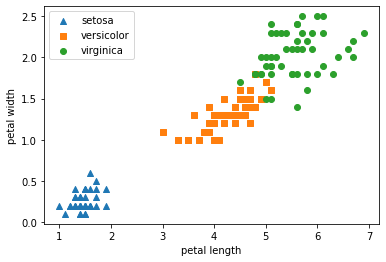

In [3]:
markers= ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [4]:
# versicolor와 virginica는 sepal length와 sepal width만으로는 분류가 어렵다.

In [5]:
# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일의 영향을 받는다.
# PCA가 분산을 중요시하기에 평균0, 분산을 1로 맞춰주는 것이 중요한 것이 아닐까 샆다.
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [6]:
# PCA를 적용해 4차원(4개의 속성)을 2차원(2개의 PCA속성)으로 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape) # iris_pca는 변환된 PCA 데이터 세트를 150x2 넘파이 행렬로 가지고 있다.

(150, 2)


In [7]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


### 어떻게 pca_component가 구성되는가에 대한 답변
아쉽게도(제가 아는한) 정확히 알 수 있는 방법은 없습니다. 가령 키 60% 몸무게 40%와 같은 형태로 알 수 없습니다.

PCA는 개별 Feature들의 공분산에 기반하여 고유 벡터를 추출하고, 이 고유 벡터를 기반으로 하여 원본 데이터를 선형 변환하는 방식입니다. 이렇게 선형 변환된 데이터를 정확하지는 않지만 손실을 감안하여 원본 데이터와 유사하게 원복은 할 수 있습니다만, 이렇게 하더라도 각 Feature들이 얼만큼 결합되어 PCA변환되었는지 정확히 알 수 있는 방법은 없습니다.

개괄적으로나마 알기 위해서는 약간의 노가다(?) 방법을 동원할 수도 있습니다.

만일 10개의 FEATURE들이 있고 이를 2개의 PCA component로 변환한다면 10개중 4~5개 정도를 임의로 선택하여 2개의 PCA 로 변환할 때 얼마나 원본과 explained variance ratio가 차이나는지 feature들을 반복해서 테스트 하면서 가장 좋은 feature들을 가려내면서 감을 잡는 방법입니다.

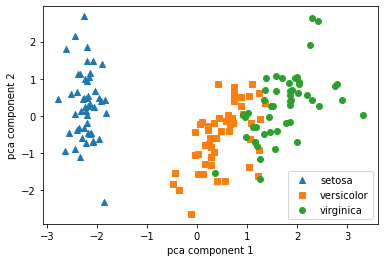

In [8]:
markers= ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca component 1')
plt.ylabel('pca component 2')
plt.show()

In [9]:
pca.explained_variance_ratio_ # 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율

array([0.72962445, 0.22850762])

In [10]:
# PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.

In [11]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교

# 원본
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [12]:
# PCA 변환
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [13]:
# 4개의 속성이 2개로 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

### PCA의 적용 목적이 무엇인가에 대한 답변
PCA를 사용하는 목적은 차원 축소를 통해 기존의 데이터 세트의 새로운 면을 발견하는것이 주요 목적입니다.

원본 데이터가 아닌 PCA변환된 데이터 세트를 기반으로 Classification/Regression의 수행성능을 높일 수 있는 경우는 그리 흔하지 않습니다. 그 흔하지 않은 경우중에 만일 상관 관계가 높은 피처들이 많은 데이터 세트가 있을 경우에는 PCA로 변환을 한 데이터 세트에 변환을 해서 예측 성능이 좋아 질 수도 있지만, 근래 머신러닝 알고리즘들은 성능 자체가 좋아져서 그런 경우가 나오기도 어렵습니다.

과거에 차원 축소를 해서 Classification/Regression에 적용한 경우에는 예측 성능을 향상 시키려는 목적 보다는 학습/예측 수행 시간을 줄이려는 목적이 더 강합니다. 요즘은 H/W(특히 메모리 크기)가 좋아져서 크게 속도 차이도 나지 않습니다.

Classification/Regression에 PCA를 활용하는 경우는 주로 원본 데이터 세트에 PCA 변환된 데이터 세트를 피처로 추가한 데이터 세트에 학습/예측을 수행하는 것입니다. 즉 원본 데이터가 A,B,C  피처, PCA 변환된 데이터를 A-1, B-1 로 하면, A,B,C,A-1,B-1 데이터 세트를 학습/예측에 사용하는 것입니다. 이런 방식을 Semi-supervised 방식이라고 합니다. 하지만 이 방법은 실시간 예측을 할 수 없습니다. 학습 데이터는 미리 이런 방식으로 만들 수 있지만, 예측 데이터는 실시간으로 pca 변환한 데이터를 만들기 어렵기 때문에 이 방식은 배치 기반의 예측 데이터를 기반으로 할때 적용해 볼 수 있는 방식입니다.

질문에 대한 답변을 요약드리면 아래와 같습니다.

1. PCA를 비롯한 차원 축소 알고리즘을 차원 축소를 통해 기존의 데이터 세트에서 새로운 면을 발견하는 것이며, 또한 기존 데이터 세트에서 중요한 FEATURE 들의 영향력이 얼마나 되는지를 파악하는 것입니다.

2. 차원 축소를 하면 일반적으로 예측 성능이 떨어집니다.  Classification/Regression (약간의) 수행 성능을 향상시키는 기법으로 원본 데이터 세트에 PCA 차원 축소된 데이터 세트를 추가하여 학습/예측하는 Semi-supervised 기법이 있습니다.

3. 피처가 많을 때 사용한다는 것이, 상관관계가 높은 피처가 많을 때 사용한다는 것이 일반적이나 피처의 갯수가 수백개를 넘어서는 경우 메모리 사이즈의 이슈가 있다면 pca 적용을 고려해 볼수 있습니다.

4. Regression에서 동일하게 적용됩니다.